In [180]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [181]:
data=pd.read_csv('tumor_classification_dataset.csv')

In [182]:
data

,x1,x2,y
0,0.127071,1.013042,1
1,2.312935,3.770534,1
2,3.340428,3.420996,1
3,3.294548,0.595620,1
4,1.944105,1.477241,1
...,...,...,...
195,-3.325239,0.080488,0
196,-1.741314,2.970952,0
197,-1.581615,2.196672,0
198,1.871664,2.690409,1


In [183]:
x=data.drop(columns=['y'])
x

,x1,x2
0,0.127071,1.013042
1,2.312935,3.770534
2,3.340428,3.420996
3,3.294548,0.595620
4,1.944105,1.477241
...,...,...
195,-3.325239,0.080488
196,-1.741314,2.970952
197,-1.581615,2.196672
198,1.871664,2.690409


In [184]:
x.shape

(200, 2)

In [185]:
y=data['y'].values
y

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0], dtype=int64)

In [186]:
y.shape

(200,)

In [187]:
x=x.values

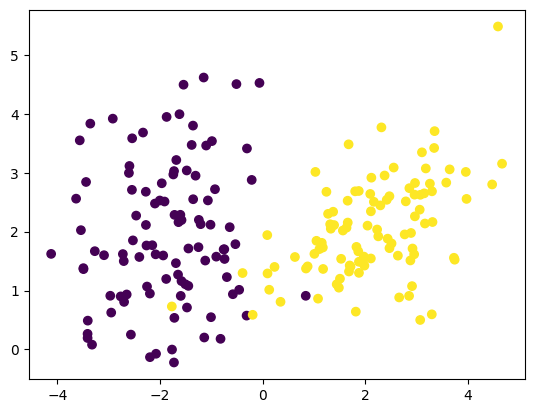

In [188]:
plt.scatter(x[:,0],x[:,1],c=y)

In [236]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [237]:
n=X_train.shape[1]
w=np.random.randn(n)
b=0

In [238]:
def step(z):
    return 1 if z >= 0 else 0 

In [239]:
def train_perceptron(X, y,weights,bias):
    learning_rate=0.0001
    epochs=40
    for _ in range(epochs):
        for i in range(len(X)):
            weighted_sum = np.dot(X[i], weights) + bias
            prediction = step(weighted_sum)
            error = y[i] - prediction
            weights += learning_rate * error * X[i]
            bias += learning_rate * error
    
    return weights, bias


In [240]:
def predict_perceptron(X, weights, bias):
    predictions = []
    for i in range(len(X)):
        weighted_sum = np.dot(X[i], weights) + bias
        prediction = step(weighted_sum)
        predictions.append(prediction)
    return np.array(predictions)

In [241]:
weights, bias = train_perceptron(X_train, y_train,w,b)

In [242]:
predictions = predict_perceptron(X_test, weights, bias)
print('Actual Value',y_test)
print("Predictions after training:", predictions)

Actual Value [0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1
 0 1 1]
Predictions after training: [0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1
 0 1 1]


In [243]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


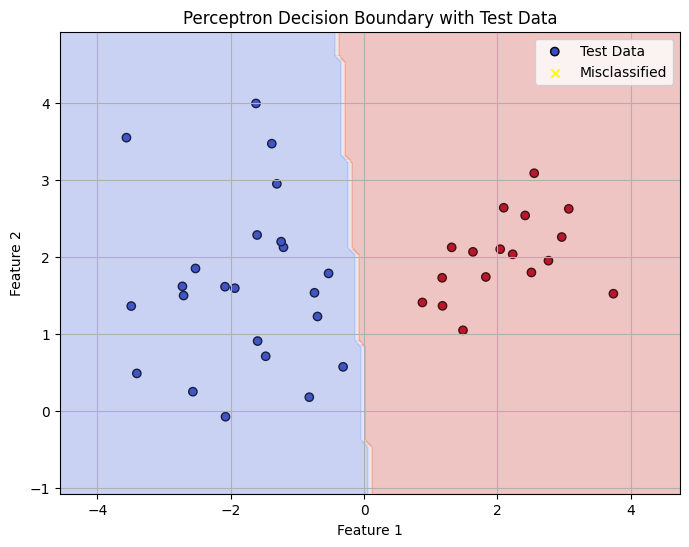

In [244]:
# Visualization
plt.figure(figsize=(8, 6))

# Plot test points with true labels
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k', marker='o', label='Test Data')

# Plot decision boundary
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict labels for grid points
grid_predictions = predict_perceptron(np.c_[xx.ravel(), yy.ravel()], weights, bias)
grid_predictions = grid_predictions.reshape(xx.shape)
plt.contourf(xx, yy, grid_predictions, alpha=0.3, cmap='coolwarm')

# Highlight misclassified points
misclassified = y_test != predictions
plt.scatter(X_test[misclassified, 0], X_test[misclassified, 1], c='yellow', marker='x', label='Misclassified')

# Finalize the plot
plt.title("Perceptron Decision Boundary with Test Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(loc='best')
plt.grid(True)
plt.show()